# Custom Bird Migration Data Analysis

## Imports

In [1]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Allow the use of custom functions in the utils folder if needed
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath('..'))

## Cleaning the Dataset

### Initializing Dataframe 

In [ ]:
# Initialize dataframe to read
df = pd.read_csv('../data/Bird_Migration_Custom_Data.csv')

# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   species          26 non-null     object 
 1    herd            26 non-null     int64  
 2    year            26 non-null     int64  
 3    month           26 non-null     int64  
 4    day             26 non-null     int64  
 5    longitude       26 non-null     float64
 6    latitude        26 non-null     float64
 7    temperature     26 non-null     int64  
 8    wind_speed      26 non-null     int64  
 9    wind_direction  26 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 2.2+ KB


### Cleaning the dataset

In [ ]:
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Remove leading and trailing whitespaces from each cell
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].str.strip()

## Basic Machine Learning Model Training & Analysis

### Performing a train test split

In [ ]:
# Perform a train test split 

#Initialize features and targets
features = df[['month','temperature']]
target = df['wind_speed']

# Initialize Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

### Initialize Machine Learning Models

In [ ]:
# Initilize different bacic machine learning models
model_linear = LinearRegression()
model_rf = RandomForestRegressor()
model_svr = SVR()
model_knn = KNeighborsRegressor(n_neighbors = 2)
model_gb = GradientBoostingRegressor() 
model_dt = DecisionTreeRegressor()

# Train the models
model_linear.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svr.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

### Make Predictions and Evaluate Performance

The Mean Squared Error(MSE) measures the average squared difference between the rpedicted values and the actual values. It quantifies how close the predictions are to the actual outcome.
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

The $R^2$ represents the proportion of the variance in the target variable. Mesaures the 'goodness of fit' of the model. 1 Indicates that the model explains 100% of the variance in the target variable. 0 indicates that the models explains none of the variance and the predictions are **as good as the mean of the target variable**. An $R^2$ < 0 indicates that the model performs worse than a simple mean-bsaed prediction.
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$


#### Making predictions on Test Set

In [ ]:
# Import methods created in the utils folder
from utils.metrics import evaluate_model

# Make predictions
y_pred_linear = model_linear.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svr = model_svr.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_dt = model_dt.predict(X_test)

#### Evaluating Machine Learning Models

In [ ]:
# Evaluate performance
mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
mse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)
mse_knn, r2_knn = evaluate_model(y_test, y_pred_knn)
mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svr = r2_score(y_test, y_pred_svr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the results
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R^2 Score: {r2_linear}")

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")

print("\nSupport Vector Regressor Performance:")
print(f"Mean Squared Error: {mse_svr}")
print(f"R^2 Score: {r2_svr}")

print("\nK-Nearest Neighbors Regressor Performance:")
print(f"Mean Squared Error: {mse_knn}")
print(f"R^2 Score: {r2_knn}")

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")

print("\nDecision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")

Linear Regression Performance:
Mean Squared Error: 2.7549231896007065
R^2 Score: 0.20658212139499632

Random Forest Regressor Performance:
Mean Squared Error: 3.6184258294145764
R^2 Score: -0.042106638871398205

Support Vector Regressor Performance:
Mean Squared Error: 2.3712515816391484
R^2 Score: 0.3170795444879251

K-Nearest Neighbors Regressor Performance:
Mean Squared Error: 2.5833333333333335
R^2 Score: 0.2559999999999998

Gradient Boosting Regressor Performance:
Mean Squared Error: 4.714624238075614
R^2 Score: -0.357811780565777

Decision Tree Regressor Performance:
Mean Squared Error: 4.717592592592593
R^2 Score: -0.35866666666666713


#### Making Predictions

Predictions need to be based on the number of features. This means that if you have 5 features that were used to train the model, you need 5 inputs to make a prediction

In [ ]:
# Example of individual user input
user_input_month = 7
user_input_temp = 25

# Combine indiividual user input to same format as what was trained
user_input = [[user_input_month,user_input_temp]]

# Make predictions with each model
y_pred_linear_new = model_linear.predict(user_input)
y_pred_rf_new = model_rf.predict(user_input)
y_pred_svr_new = model_svr.predict(user_input)
y_pred_knn_new = model_knn.predict(user_input)
y_pred_gb_new = model_gb.predict(user_input)
y_pred_dt_new = model_dt.predict(user_input)

# Output predictions
print("Prediction using Linear Regression:")
print(y_pred_linear_new)

print("\nPrediction using Random Forest Regressor:")
print(y_pred_rf_new)

print("\nPrediction using Support Vector Regressor:")
print(y_pred_svr_new)

print("\nPrediction using K-Nearest Neighbors Regressor:")
print(y_pred_knn_new)

print("\nPrediction using Gradient Boosting Regressor:")
print(y_pred_gb_new)

print("\nPrediction using Decision Tree Regressor:")
print(y_pred_dt_new)


Prediction using Linear Regression:
[5.39795918]

Prediction using Random Forest Regressor:
[5.57]

Prediction using Support Vector Regressor:
[5.00708565]

Prediction using K-Nearest Neighbors Regressor:
[6.]

Prediction using Gradient Boosting Regressor:
[5.99947322]

Prediction using Decision Tree Regressor:
[6.]


c:\Users\Ivan\Documents\CMA\ML Caribou Migration\Machine-Learning-Caribou-Migration\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Documents\CMA\ML Caribou Migration\Machine-Learning-Caribou-Migration\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Documents\CMA\ML Caribou Migration\Machine-Learning-Caribou-Migration\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Documents\CMA\ML Caribou Migration\Machine-Learning-Caribou-Migration\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Documen

#### Graphs

##### Model Predictions vs. Actual Values

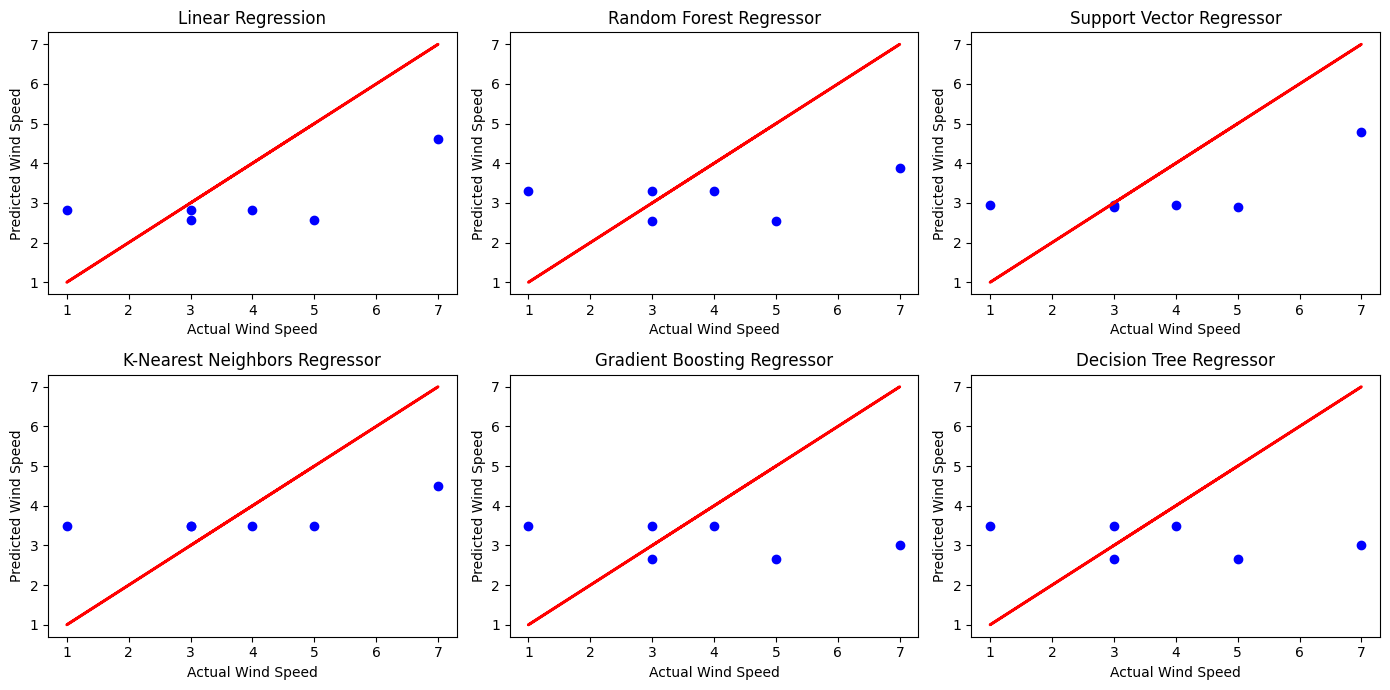

In [ ]:
# Plot predictions vs. actual values
plt.figure(figsize=(14, 7))

# Linear Regression
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Linear Regression')

# Random Forest Regressor
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Random Forest Regressor')

# Support Vector Regressor
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Support Vector Regressor')

# K-Nearest Neighbors Regressor
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('K-Nearest Neighbors Regressor')

# Gradient Boosting Regressor
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_gb, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Gradient Boosting Regressor')

# Decision Tree Regressor
plt.subplot(2, 3, 6)
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Decision Tree Regressor')

plt.tight_layout()
plt.show()


##### Learning Curves

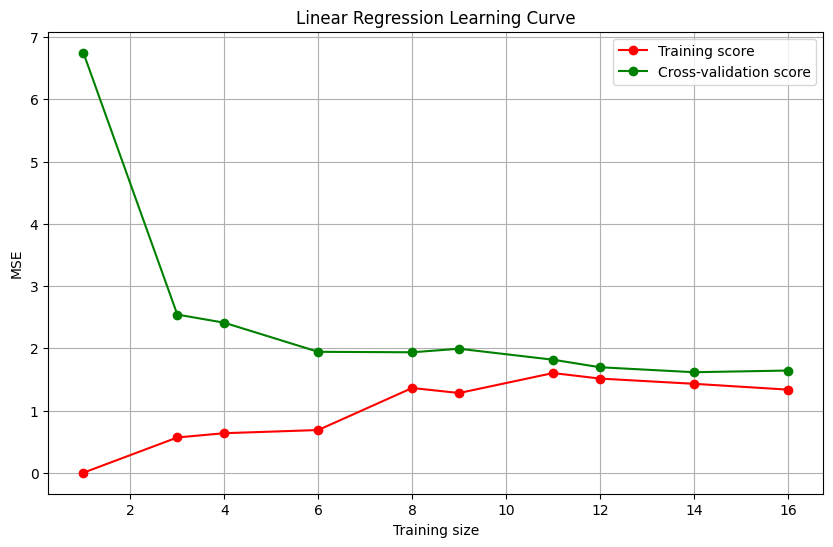

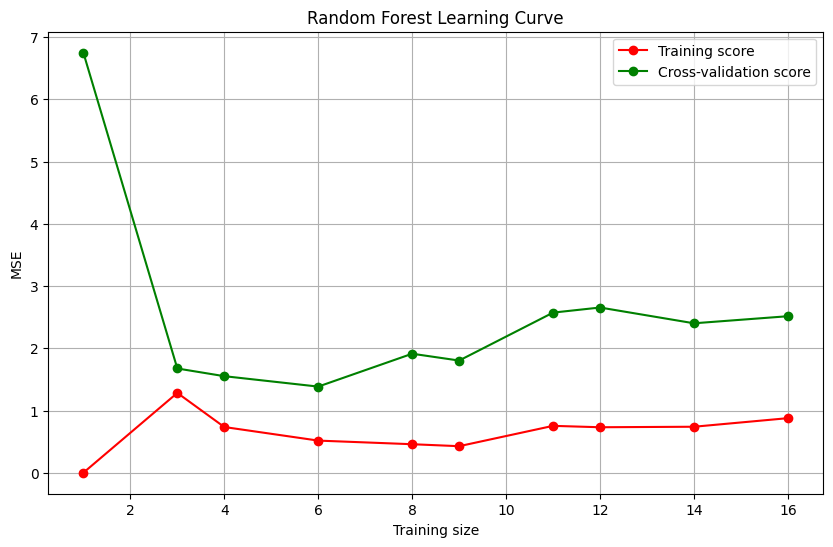

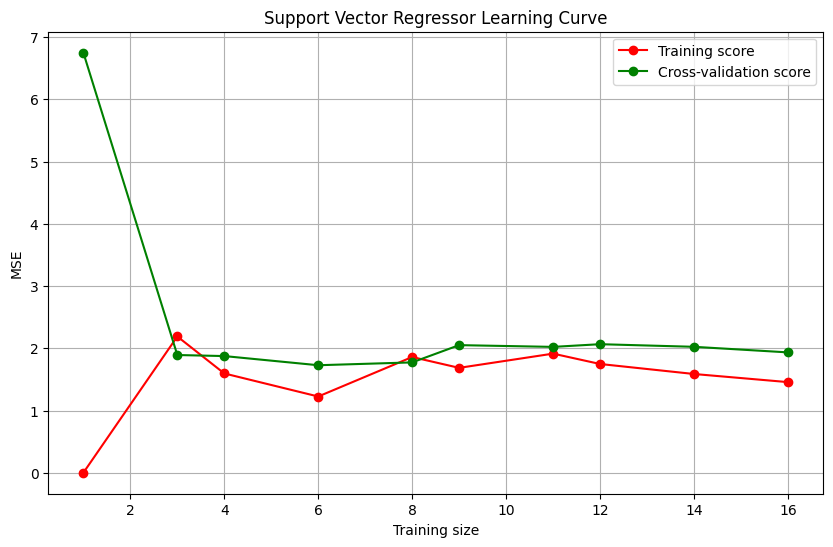

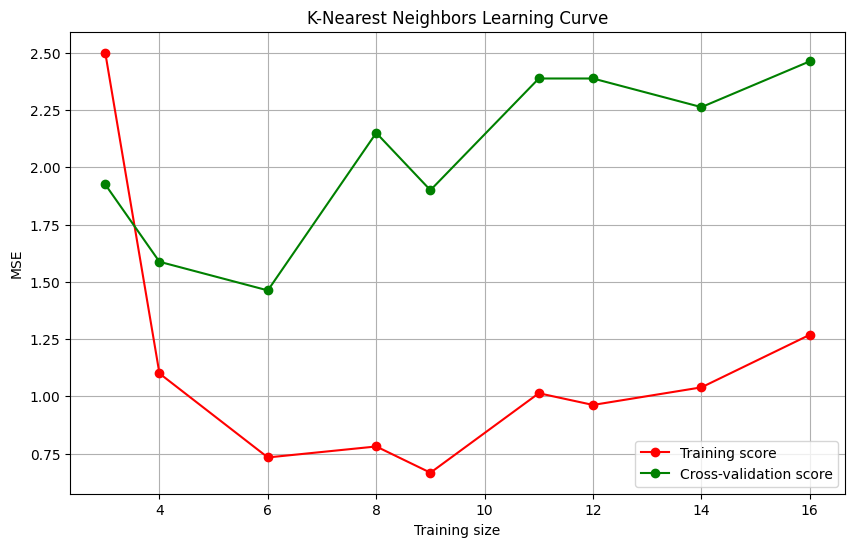

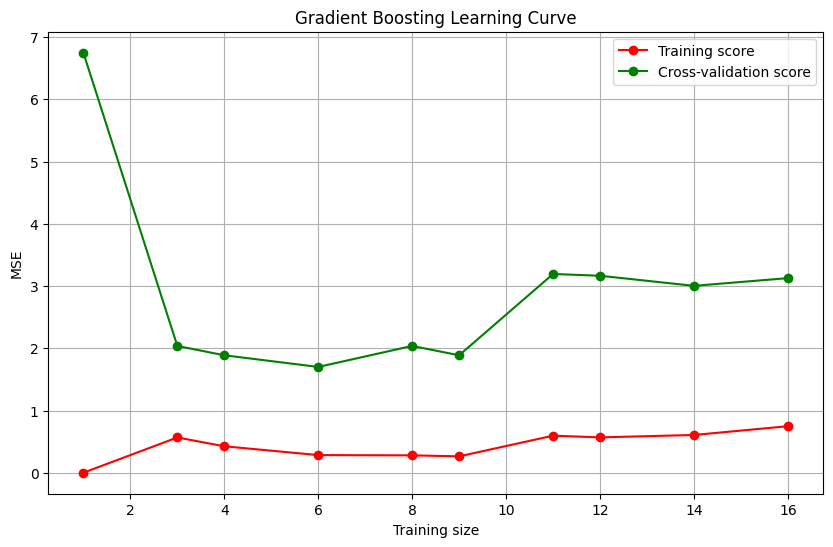

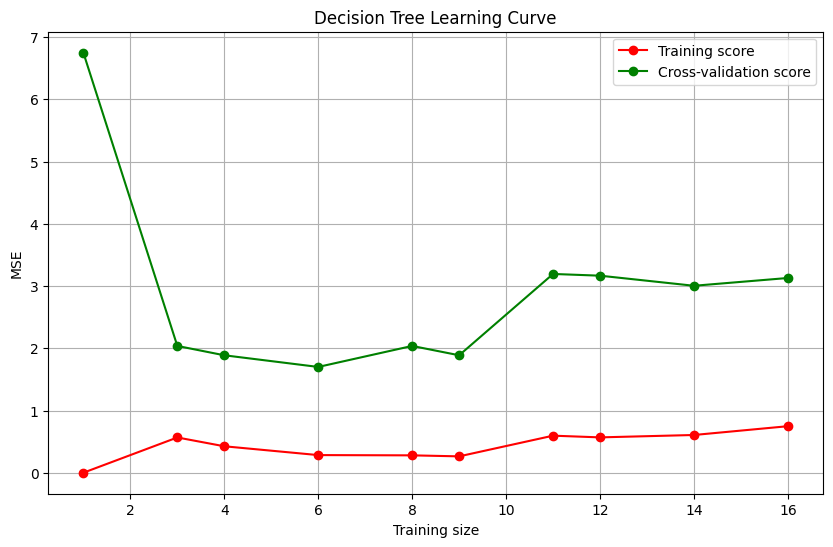

In [ ]:
from utils.plot_learning_curve import plot_learning_curve

# Plot learning curves for each model
plot_learning_curve(model_linear, X_train, y_train, title="Linear Regression Learning Curve")
plot_learning_curve(model_rf, X_train, y_train, title="Random Forest Learning Curve")
plot_learning_curve(model_svr, X_train, y_train, title="Support Vector Regressor Learning Curve")
plot_learning_curve(model_knn, X_train, y_train, title="K-Nearest Neighbors Learning Curve")
plot_learning_curve(model_gb, X_train, y_train, title="Gradient Boosting Learning Curve")
plot_learning_curve(model_dt, X_train, y_train, title="Decision Tree Learning Curve")


##### Pair Plots for all Columns

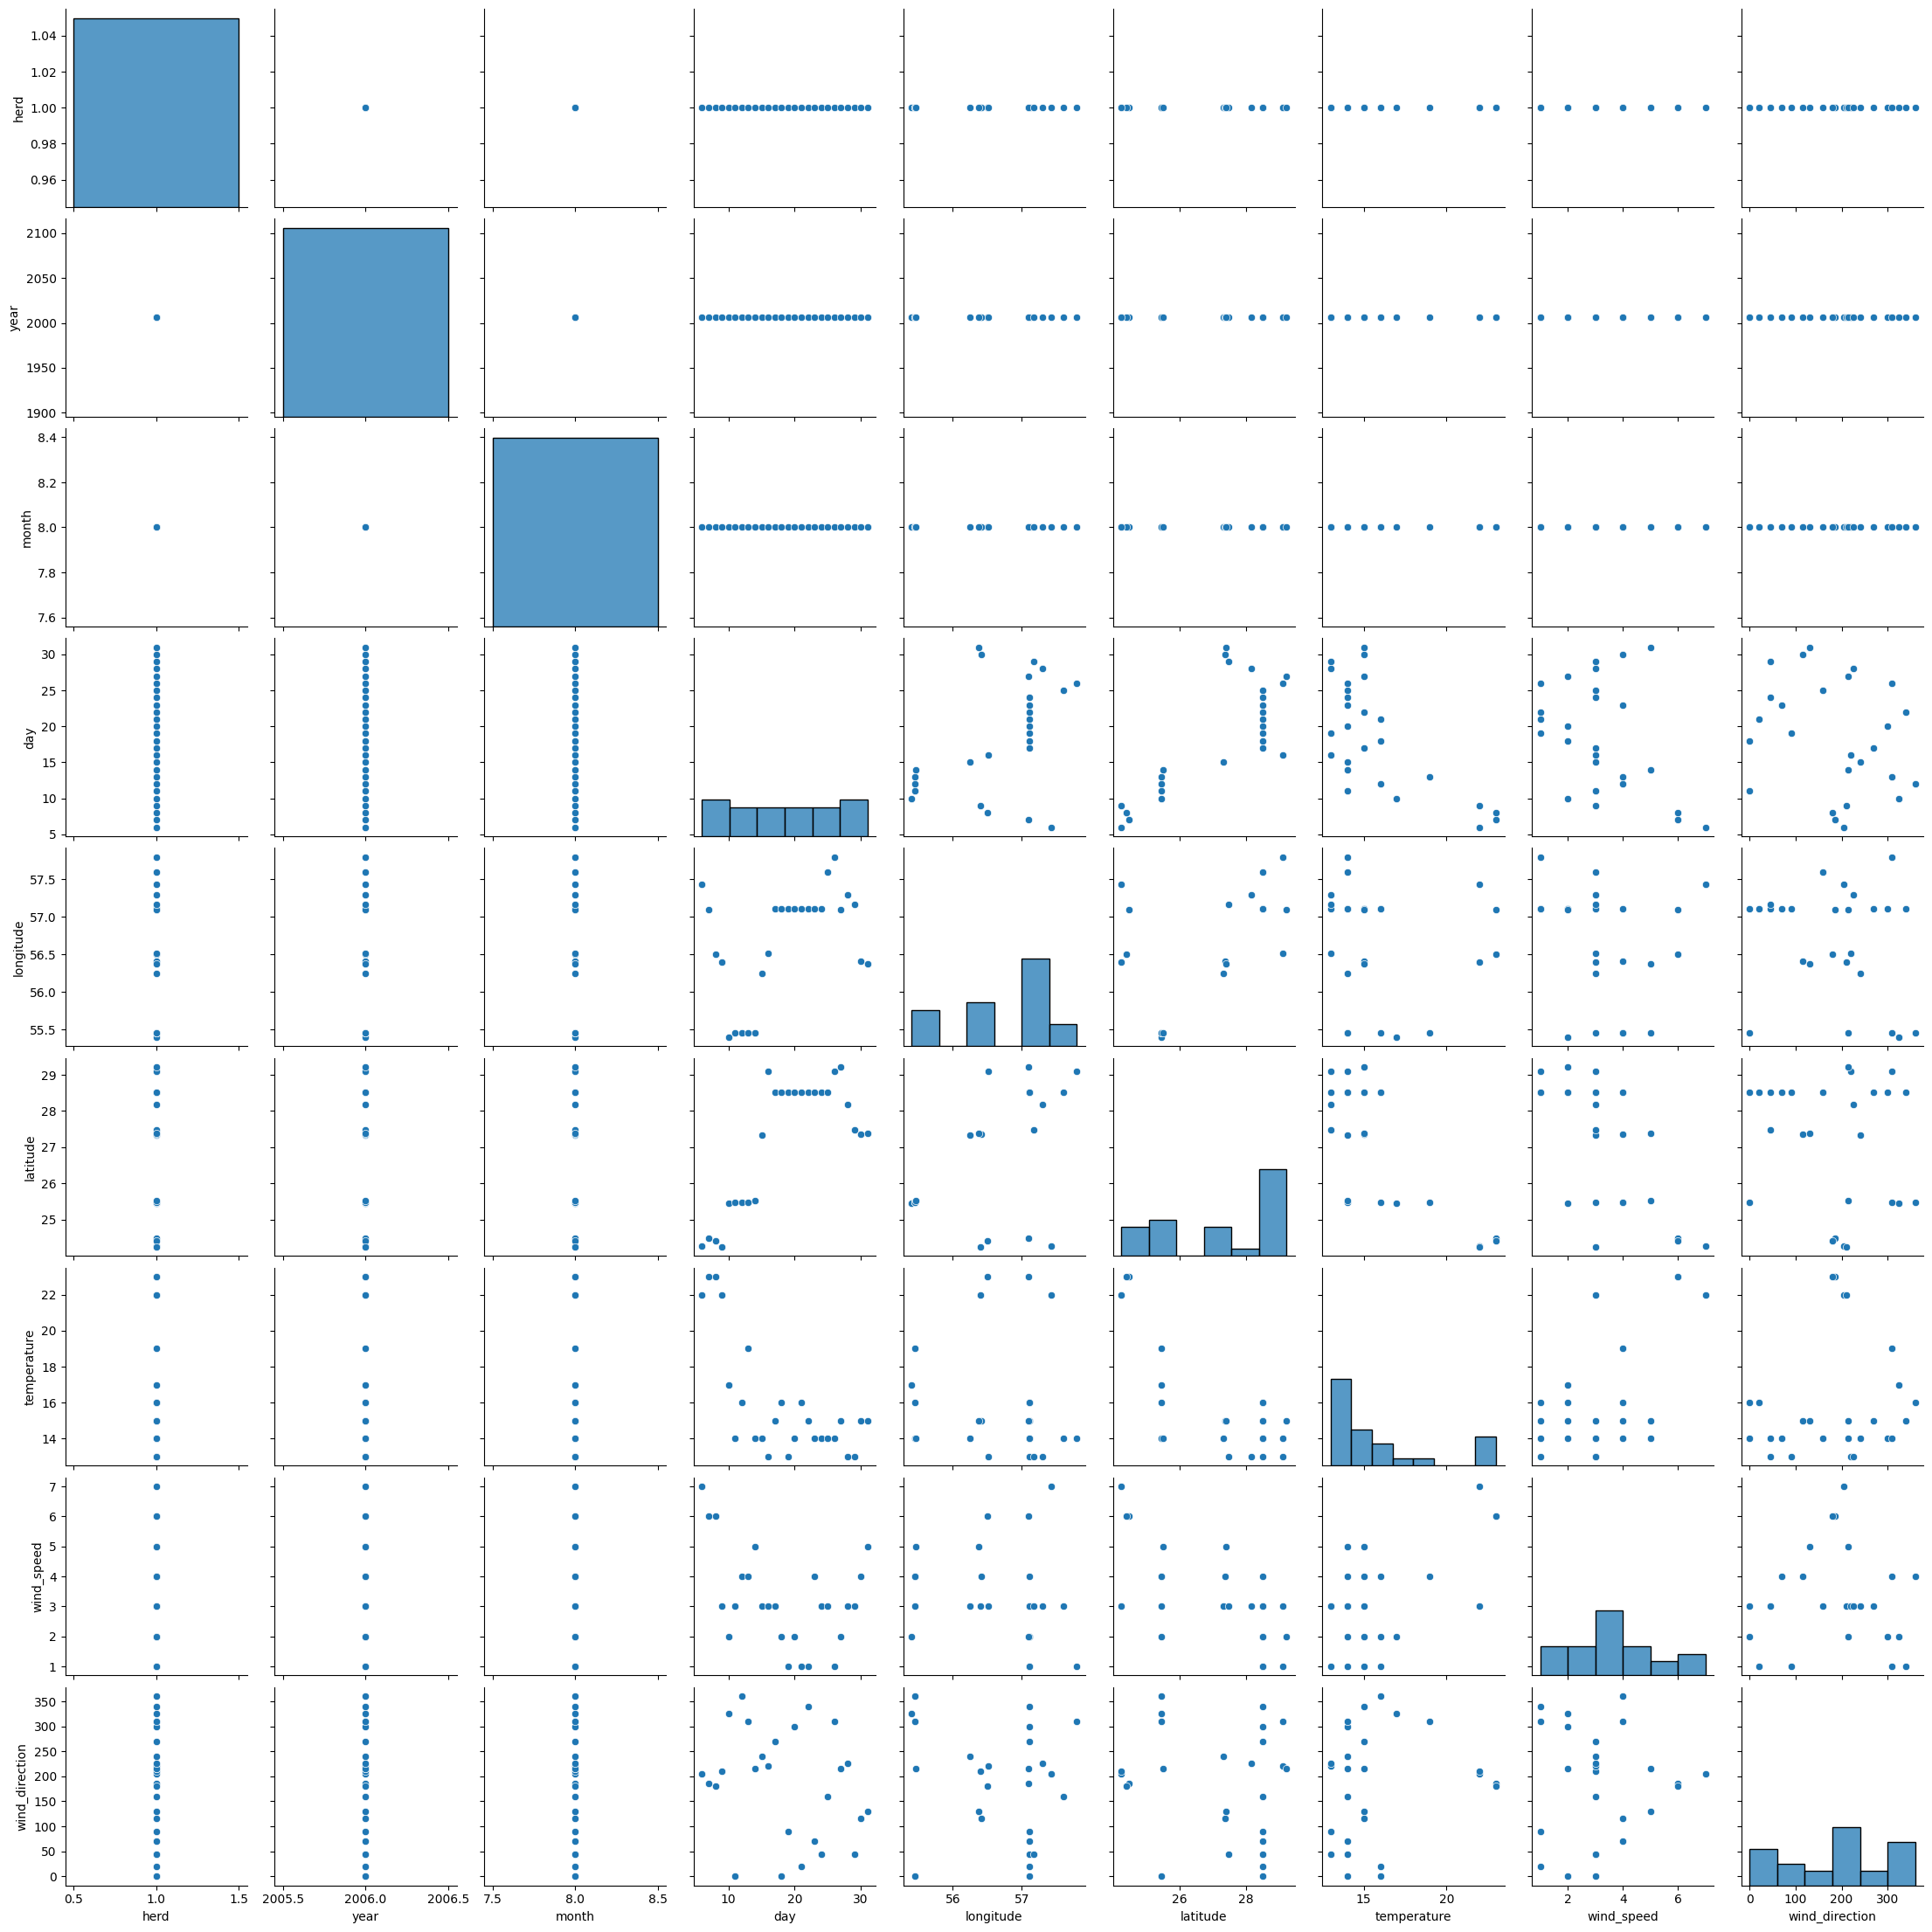

In [ ]:
# Use seaborn to show the relationhsip of every column and visulize it
sns.pairplot(df)
plt.show()

##### Correlaion Matrix

Helps identify **Linear relationships** between variables

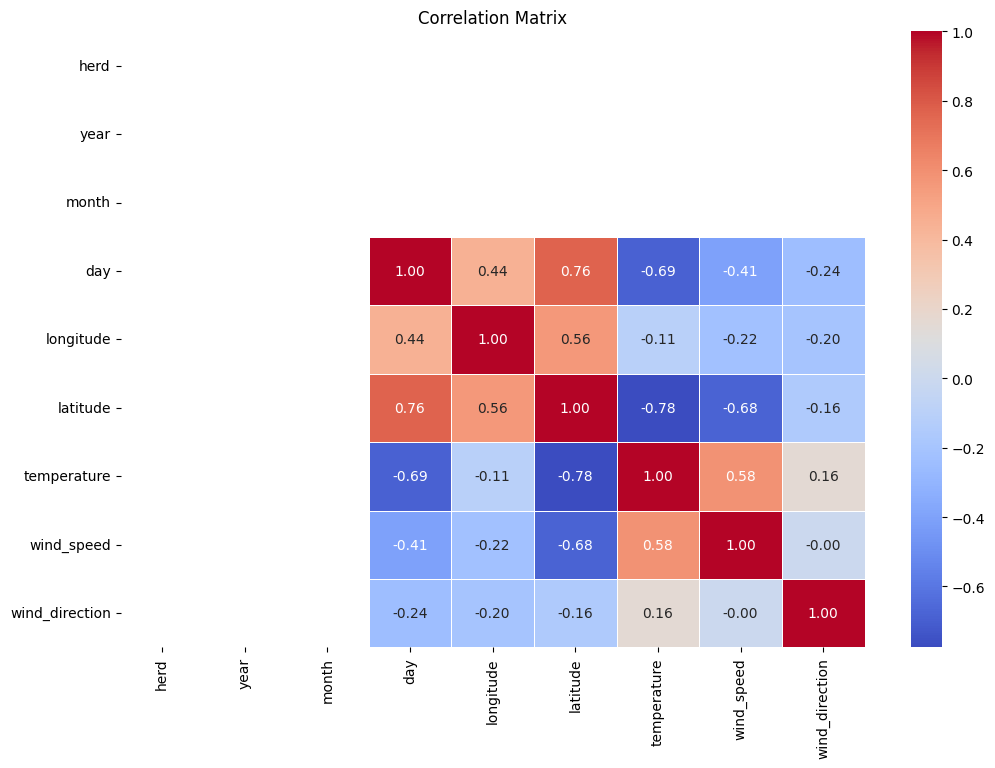

In [ ]:
# Need to first make sure that all datatypes of the dataframe are numerical
# You can do this by only chossing the numerical columns OR using a labelencoder and convert the object datatypes to numerical

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
